### Random forest

In [1]:
def intro():
    '''
        The idea behind random forests is that each tree might do a relatively
        good job of predicting, but will likely overfit on part of the data. If we build many
        trees, all of which work well and overfit in different ways, we can reduce the amount
        of overfitting by averaging their results. This reduction in overfitting, while retaining
        the predictive power of the trees, can be shown using rigorous mathematics
    '''
print(intro.__doc__)


        The idea behind random forests is that each tree might do a relatively
        good job of predicting, but will likely overfit on part of the data. If we build many
        trees, all of which work well and overfit in different ways, we can reduce the amount
        of overfitting by averaging their results. This reduction in overfitting, while retaining
        the predictive power of the trees, can be shown using rigorous mathematics
    


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

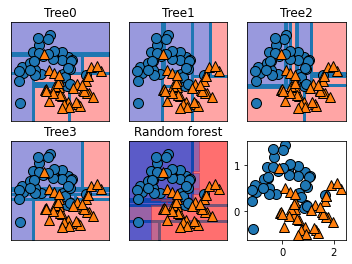

In [6]:
fig, axes = plt.subplots(2, 3)
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree{}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,1], alpha=0.4)
axes[-1,1].set_title("Random forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state=0)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
print("Acuuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(forest.score(X_test, y_test)))

Acuuracy on training set: 0.998
Accuracy on testing set: 0.944



    As you can see, the random forest gives nonzero importance to many more features
    than the single tree. Similarly to the single decision tree, the random forest also gives
    a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter” 
    to be the most informative feature overall. The randomness in building the random forest 
    forces the algorithm to consider many possible explanations, the result being that the random forest 
    captures a much broader picture of the data than a single tree.



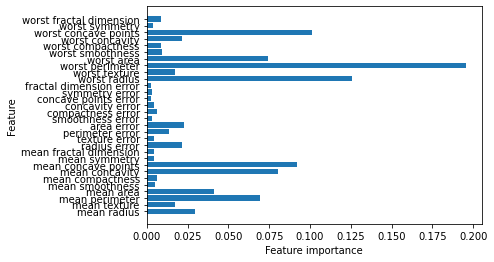

In [23]:
def plot_feature_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature") 
plot_feature_importance(forest)

'''
    As you can see, the random forest gives nonzero importance to many more features
    than the single tree. Similarly to the single decision tree, the random forest also gives
    a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter” 
    to be the most informative feature overall. The randomness in building the random forest 
    forces the algorithm to consider many possible explanations, the result being that the random forest 
    captures a much broader picture of the data than a single tree.
'''
print(__doc__)

In [22]:
forest.feature_importances_

array([0.02969122, 0.01720923, 0.06929807, 0.04112995, 0.00500449,
       0.00636883, 0.08056202, 0.09200666, 0.00435231, 0.0042842 ,
       0.02136349, 0.00420529, 0.01354811, 0.02303752, 0.00288949,
       0.00593161, 0.00468708, 0.0027883 , 0.003081  , 0.00229185,
       0.12542246, 0.01704882, 0.19536571, 0.0743788 , 0.00948886,
       0.0086519 , 0.02172119, 0.10149821, 0.00399358, 0.00869974])

In [24]:
def ending_notes_on_random_forest():
    '''
        
    '''

### Gradient boosted regression trees

In [25]:
'''
    The gradient boosted regression tree is another ensemble method that combines multiple decision trees 
    to create a more powerful model. Despite the “regression” in the
    name, these models can be used for regression and classification. In contrast to the
    random forest approach, gradient boosting works by building trees in a serial manner, 
    where each tree tries to correct the mistakes of the previous one. By default, there
    is no randomization in gradient boosted regression trees; instead, strong pre-pruning
    is used. Gradient boosted trees often use very shallow trees, of depth one to five,
    which makes the model smaller in terms of memory and makes predictions faster.
    
    The main idea behind gradient boosting is to combine many simple models (in this
    context known as weak learners), like shallow trees. Each tree can only provide good
    predictions on part of the data, and so more and more trees are added to iteratively
    improve performance.
    
    Apart from the pre-pruning and the number of trees in the ensemble, another important parameter 
    of gradient boosting is the learning_rate, which controls how
    strongly each tree tries to correct the mistakes of the previous trees. A higher learning
    rate means each tree can make stronger corrections, allowing for more complex models. 
    Adding more trees to the ensemble, which can be accomplished by increasing
    n_estimators, also increases the model complexity, as the model has more chances
    to correct mistakes on the training set.
'''
print(__doc__)


    The gradient boosted regression tree is another ensemble method that combines multiple decision trees 
    to create a more powerful model. Despite the “regression” in the
    name, these models can be used for regression and classification. In contrast to the
    random forest approach, gradient boosting works by building trees in a serial manner, 
    where each tree tries to correct the mistakes of the previous one. By default, there
    is no randomization in gradient boosted regression trees; instead, strong pre-pruning
    is used. Gradient boosted trees often use very shallow trees, of depth one to five,
    which makes the model smaller in terms of memory and makes predictions faster.
    
    The main idea behind gradient boosting is to combine many simple models (in this
    context known as weak learners), like shallow trees. Each tree can only provide good
    predictions on part of the data, and so more and more trees are added to iteratively
    improve performance.


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.958


In [31]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on testing set: 0.965


In [33]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on testing set: 0.944


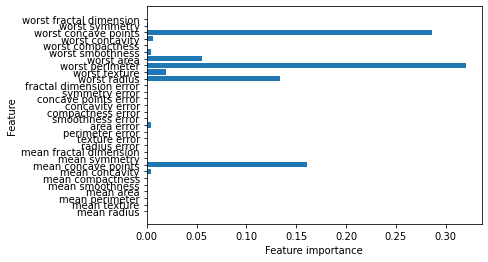

In [34]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importance(gbrt)

### Kernalized SVM

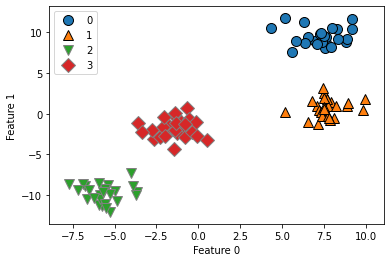

In [65]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()

/home/aditya/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


ValueError: cannot reshape array of size 4000000 into shape (1000,1000)

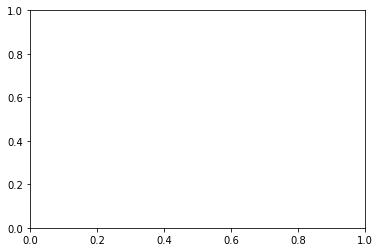

In [66]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'Feature1 ** 2')

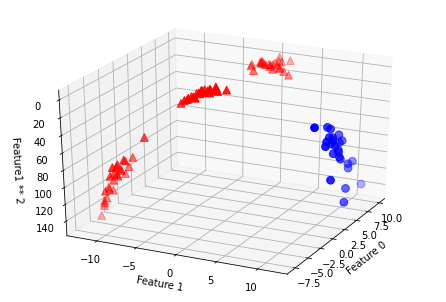

In [99]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker = '^',
          cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature1 ** 2")

/home/aditya/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature0 ** 2')

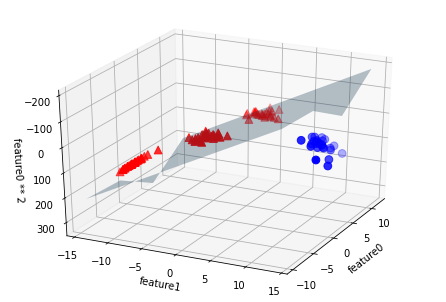

In [85]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 4)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 4)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

In [87]:
XX

array([[-9.74064658, -2.51743838,  4.70576982, 11.92897802],
       [-9.74064658, -2.51743838,  4.70576982, 11.92897802],
       [-9.74064658, -2.51743838,  4.70576982, 11.92897802],
       [-9.74064658, -2.51743838,  4.70576982, 11.92897802]])

Text(0, 0.5, 'Feature 1')

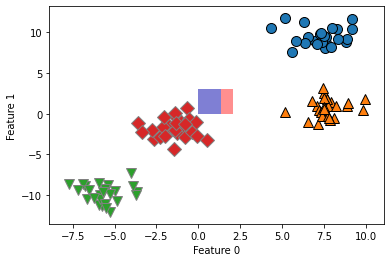

In [96]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

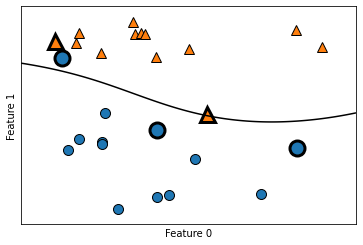

In [110]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


    Going from left to right, we increase the value of the parameter gamma from 0.1 to 10.
    A small gamma means a large radius for the Gaussian kernel, which means that many
    points are considered close by. This is reflected in very smooth decision boundaries
    on the left, and boundaries that focus more on single points further to the right. A
    low value of gamma means that the decision boundary will vary slowly, which yields a
    model of low complexity, while a high value of gamma yields a more complex model.



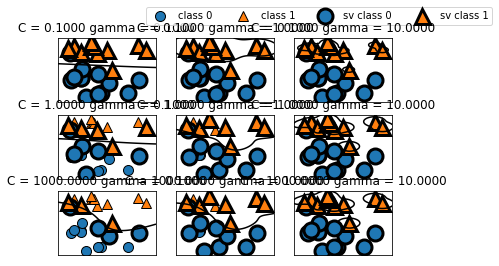

In [115]:
fig , axes = plt.subplots(3, 3)

for ax, C in zip(axes, [-1, 0, 3]):
    for a,  gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                 ncol=4, loc=(0.9, 1.2))

'''
    Going from left to right, we increase the value of the parameter gamma from 0.1 to 10.
    A small gamma means a large radius for the Gaussian kernel, which means that many
    points are considered close by. This is reflected in very smooth decision boundaries
    on the left, and boundaries that focus more on single points further to the right. A
    low value of gamma means that the decision boundary will vary slowly, which yields a
    model of low complexity, while a high value of gamma yields a more complex model.
'''
print(__doc__)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on testing set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on testing set: 0.94


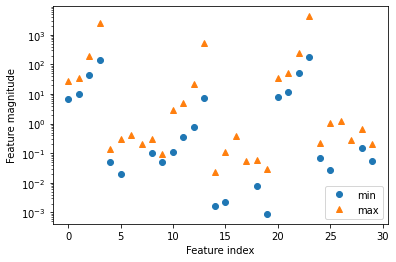

In [118]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

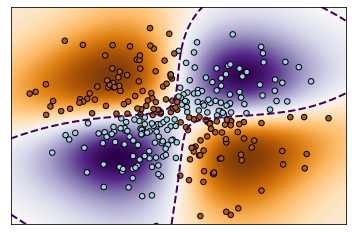

Text(0, 1, 'The color map illustrates the decision function learned by the SVC.')

<Figure size 432x288 with 0 Axes>

In [132]:
# Perform binary classification using non-linear SVC with RBF kernel. 
# The target to predict is a XOR of the inputs.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()
plt.figtext(0, 1, "The color map illustrates the decision function learned by the SVC.")